## Model Training

## 1.1 Import Data and Required Packages

### Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Modelling Packages
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [ ]:
### Importing the CSV Data as Pandas DataFrame

In [5]:
df = pd.read_csv('D:/MLProjectCICD/notebooks/data/stud.csv')

In [ ]:
### Show Top 5 Records.


In [6]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [ ]:
### Preparing X & Y Variables

In [7]:
X=df.drop(columns=['math_score'],axis=1)

In [8]:
X.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [9]:
print('Categories in gender variable:', end=" ")
print(df['gender'].unique())
print('Categories in race_ethnicity variable:', end=" ")
print(df['race_ethnicity'].unique())
print('Categories in parental_level_of_education variable:', end=" ")
print(df['parental_level_of_education'].unique())
print('Categories in lunch variable:', end=" ")
print(df['lunch'].unique())
print('Categories in test_preparation_course variable:', end=" ")
print(df['test_preparation_course'].unique())

Categories in gender variable: ['female' 'male']
Categories in race_ethnicity variable: ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in parental_level_of_education variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in lunch variable: ['standard' 'free/reduced']
Categories in test_preparation_course variable: ['none' 'completed']


In [10]:
#Dependent Avr: Maths Score
y=df['math_score']
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [12]:
#Create Column Transformer with 3 types
num_features=X.select_dtypes(exclude='object').columns
cat_features=X.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer([
    ("OneHotEncoder",oh_transformer,cat_features),
    ("StandardScaler",numeric_transformer,num_features),
])

In [13]:
#Fit& Transform
X=preprocessor.fit_transform(X)

In [14]:
X.shape

(1000, 19)

In [15]:
#Separate dataset into train & test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape

((800, 19), (200, 19))

### Create an Evaluate Function to give all metrics after model Training

In [17]:
def evaluate_model(true,predicted):
    mae=mean_absolute_error(true,predicted)
    mae=mean_squared_error(true,predicted)
    rmse=np.sqrt(mean_squared_error(true,predicted))
    r2_square=r2_score(true,predicted)
    return mae,rmse,r2_square

In [23]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3303
- Mean Absolute Error: 28.4124
- R2 Score: 0.8740
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.4463
- Mean Absolute Error: 29.6620
- R2 Score: 0.8781


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Absolute Error: 43.4784
- R2 Score: 0.8071
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Absolute Error: 42.5064
- R2 Score: 0.8253


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.3233
- Mean Absolute Error: 28.3378
- R2 Score: 0.8743
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.3904
- Mean Absolute Error: 29.0563
- R2 Score: 0.8806


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7055
- Mean Absolute Error: 32.5523
- R2 Score: 0.8556
----------------

### Results

In [26]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.878104
5,Random Forest Regressor,0.851697
7,CatBoosting Regressor,0.848881
8,AdaBoost Regressor,0.848614
1,Lasso,0.825320
6,XGBRegressor,0.821589
3,K-Neighbors Regressor,0.783193
4,Decision Tree,0.762697


### Linear Regression

In [29]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train,y_train)
y_pred=lin_model.predict(X_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is:%.2f"%score)

Accuracy of the model is:87.81


### Plot y_pred & y_test

Text(0.5, 0, 'Predicted')

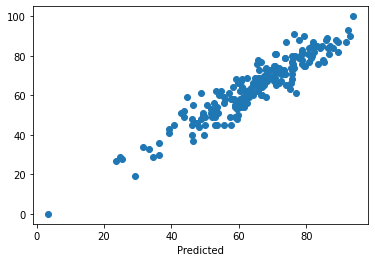

In [30]:
plt.scatter(y_pred,y_test)
plt.xlabel('Actual')
plt.xlabel('Actual')

<AxesSubplot:xlabel='math_score'>

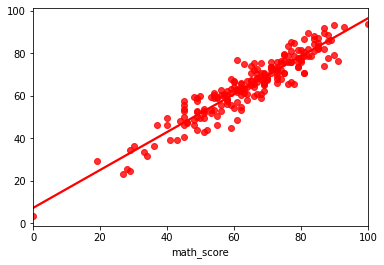

In [31]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

In [33]:
### Difference between the Actual & Actual values
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference Value':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference Value
521,91,76.40625,14.59375
737,53,59.37500,-6.37500
740,80,76.75000,3.25000
660,74,76.46875,-2.46875
411,84,87.84375,-3.84375
...,...,...,...
408,52,43.75000,8.25000
332,62,62.31250,-0.31250
208,74,67.87500,6.12500
613,65,67.03125,-2.03125
